# Визуализация данных

**Бизнес:** Банк хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов.  
**Задача:** Нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [1]:
# импорт всех необходимых для работы библиотек

import pandas as pd # для работы с данными

#библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # интерактивная визуализация
%matplotlib inline
plt.style.use('default')

In [2]:
data = pd.read_csv('data/churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

0. *RowNumber* — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
0. *CustomerId* — идентификатор клиента
0. *Surname* — фамилия клиента
0. *CreditScore* — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
0. *Geography* — страна клиента (банк международный)
0. *Gender* — пол клиента
0. *Age* — возраст клиента
0. *Tenure* — сколько лет клиент пользуется услугами банка
0. *Balance* — баланс на счетах клиента в банке
0. *NumOfProducts* — количество услуг банка, которые приобрёл клиент
0. *HasCrCard* — есть ли у клиента кредитная карта (1 — да, 0 — нет)
0. *IsActiveMember* — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
0. *EstimatedSalary* — предполагаемая заработная плата клиента
0. *Exited* — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [ ]:
# признак RowNumber можно удалить, т.к. дублирует индекс
data.drop('RowNumber', axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


По описанию признаков можем сделать вывод, что: Geography,Gender, NumOfProducts, HasCrCard, IsActiveMember, Exited относятся к категорияльному типу данных.  
Признаки HasCrCard, IsActiveMember, Exited - являются также бинарными, их можно преобразовать для наглядности.

In [ ]:
# наличие кредитной карты у клиента
data['HasCrCard'] = data['HasCrCard'].apply(lambda x: 'Нет карты' if x == 0 else 'Есть карта')
# статус активности
data['IsActiveMember'] = data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')
# ушедший или лояльный клиент
data['Exited'] = data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

In [ ]:
# разделим датасет на лояльных и ушедших, для дальнейшей работы
loyal = data[data['Exited'] == 'Лояльный']
gone = data[data['Exited'] == 'Ушедший']

### Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

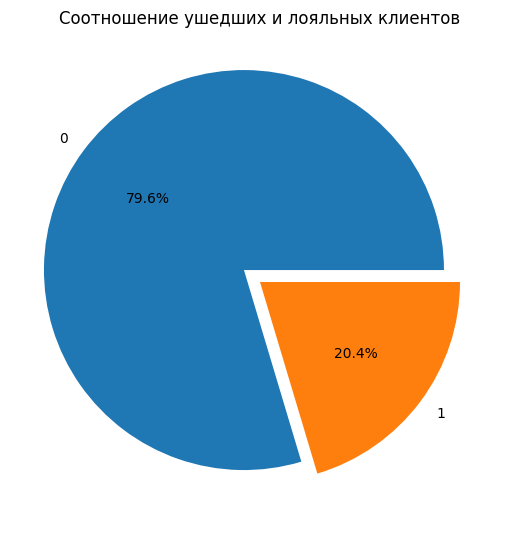

In [3]:
# соотношение от целого нагляднее будет видно на круговой диаграмме
exited_data = data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_data,
    labels=exited_data.index,
    autopct='%.1f%%', #округление до первого знака после запятой
    explode=[0.1, 0] #доля смещения от центра
)
axes.set_title('Соотношение ушедших и лояльных клиентов');

**Вывод:** Отток клиентов банка составляет 20%

### Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [5]:
balance = data[data['Balance'] > 2500] # условие баланс > 2500$

In [6]:
# построим интерактивную гистограмму, чтобы внимательнее изучить распределение
fig = px.histogram(
    balance,
    x='Balance',
    labels={'Balance':'Баланс на счету клиента, $', 'y':'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
    width=1000,
    height=500
)
fig.update_layout(
    title=dict(
        text='Распределение баланса клиентов банка',
        yanchor='top',
        x=0.5,
        font_size=20
    )
)
fig.show()

**Вывод:** Баланс клиентов имеет нормальное распределение. Медианное значение ~120т.`$`. У большинства клиентов на счетах от 100т. до 140т.`$`. Минимальное значение - 3,8т.`$`, а максимальное - 250,9т.`$`.

### Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

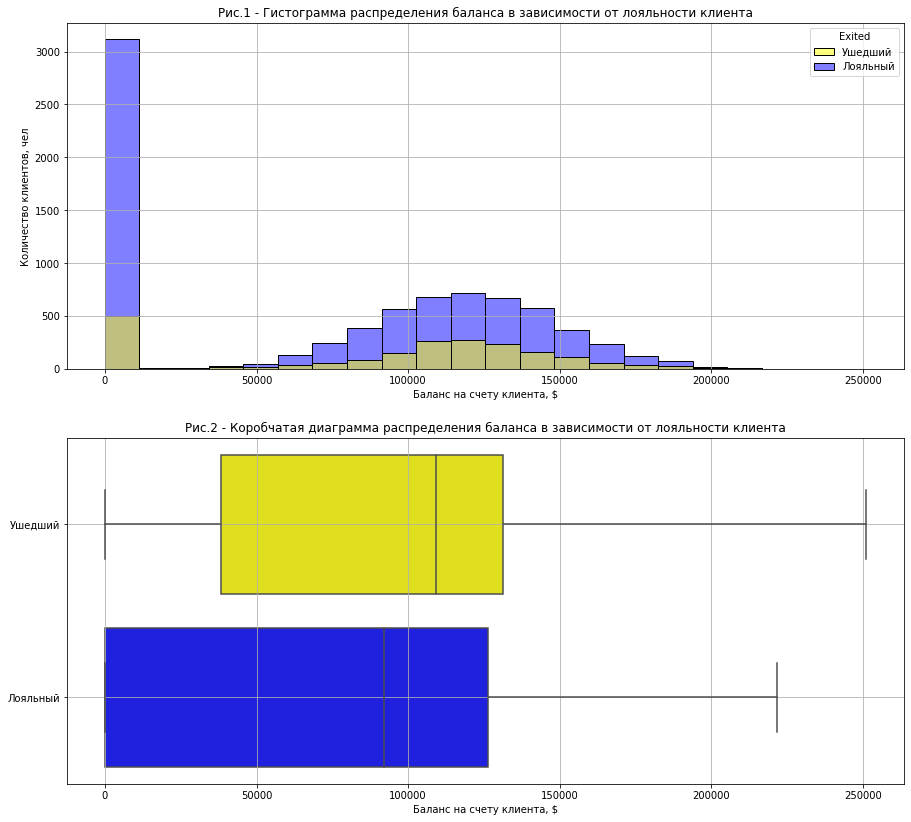

In [ ]:
# задаем кол-во графиков и размер
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1, figsize=(15, 14)) 
# определяем первый график, гистограмму распределения
histplot=sns.histplot(
    data=data, 
    x='Balance', 
    hue='Exited',
    ax=axes_3[0],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.1 - Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Баланс на счету клиента, $')
histplot.grid()
# определяем второй график, boxplot
boxplot=sns.boxplot(
    data=data,
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes_3[1],
    palette=['yellow', 'blue']
)
boxplot.set_title('Рис.2 - Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel('')
boxplot.set_xlabel('Баланс на счету клиента, $')
boxplot.grid()

**Вывод:** На гистограмме видим большое кол-во лояльных и ушедших клиентов с нулевым балансом, то есть открыли счет, но не пополняли его. В остальном лояльные и ушедшие клиенты имеют нормальное распределение. На второй дианграмме Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим кол-ом клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом.

### Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
# выделим отдельно клиентов с нулевым балансом
balance_0 = data[data['Balance'] == 0]

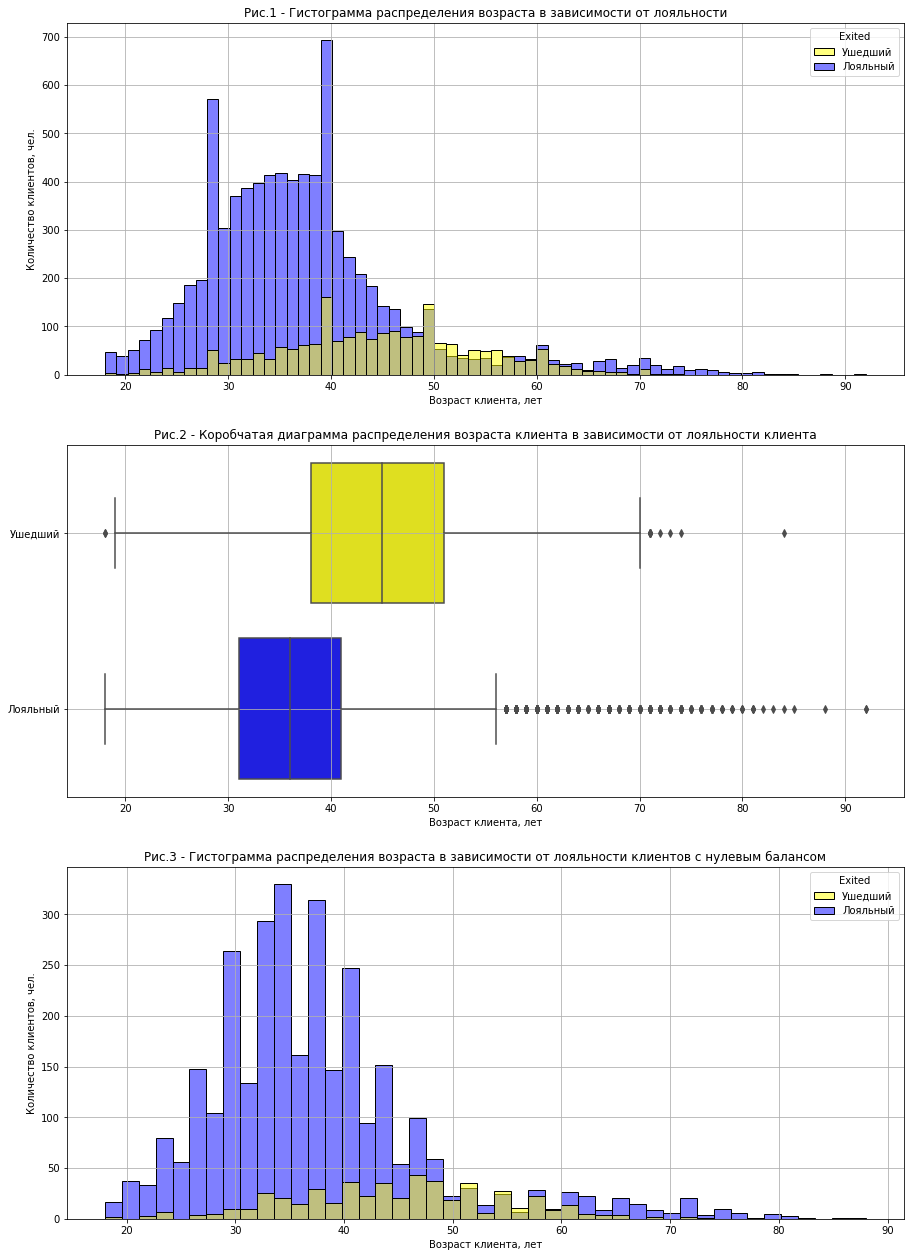

In [ ]:
# Задаем кол-во графиков и размер
fig_4, axes_4 = plt.subplots(nrows=3, ncols=1, figsize=(15, 22))
# определяем первый график, гистограмму распределения возраста
histplot = sns.histplot(
    data=data, 
    x='Age', 
    hue='Exited',
    ax=axes_4[0],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.1 - Гистограмма распределения возраста в зависимости от лояльности')
histplot.set_ylabel('Количество клиентов, чел.')
histplot.set_xlabel('Возраст клиента, лет')
histplot.grid()
# определяем второй график, boxplot для определения выбросов
boxplot = sns.boxplot(
    data=data,
    y='Exited',
    x='Age',
    orient='h',
    ax=axes_4[1],
    palette=['yellow', 'blue']
)
boxplot.set_title('Рис.2 - Коробчатая диаграмма распределения возраста клиента в зависимости от лояльности клиента')
boxplot.set_ylabel("")
boxplot.set_xlabel("Возраст клиента, лет")
boxplot.grid()
# определяем третий график, гистограмму распределения возраста клиентов с нулевым балансом
histplot = sns.histplot(
    data=balance_0, 
    x='Age', 
    hue='Exited',
    ax=axes_4[2],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.3 - Гистограмма распределения возраста в зависимости от лояльности клиентов с нулевым балансом')
histplot.set_ylabel('Количество клиентов, чел.')
histplot.set_xlabel('Возраст клиента, лет')
histplot.grid()

**Вывод:** Большинство лояльных клиентов в возрасте от 30 до 42 лет. Большое кол-во выбросов после 56 лет. А вот возраст большинства ушедших клиентов варьируется от 38 до 51 года. Выбросов мало.  
Похожее распределение мы видим и у клиентов с нулевым балансом.

### Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

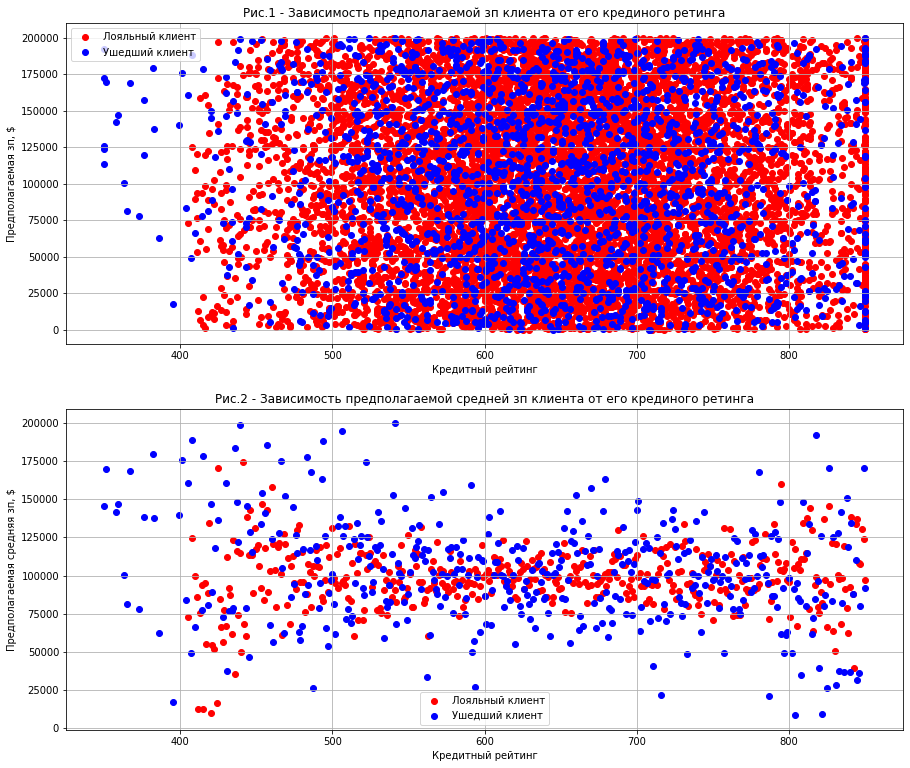

In [ ]:
# задаем кол-во графиков и размер
fig_5, axes_5 = plt.subplots(nrows=2, ncols=1, figsize=(15, 13))
# определяем первый график, зависимости зп от кредитного рейтинга
axes_5[0].scatter(
    loyal['CreditScore'], # берем данные о лояльных клиентах
    loyal['EstimatedSalary'],
    color='red',
    label='Лояльный клиент',
)
axes_5[0].scatter(
    gone['CreditScore'], # берем данные об ушедших клиентах
    gone['EstimatedSalary'],
    color='blue',
    label='Ушедший клиент',
)
axes_5[0].set_title('Рис.1 - Зависимость предполагаемой зп клиента от его крединого ретинга')
axes_5[0].set_ylabel('Предполагаемая зп, $')
axes_5[0].set_xlabel('Кредитный рейтинг')
axes_5[0].legend()
axes_5[0].grid()
# определяем второй график, зависимость средней зп от кредитного рейтинга
axes_5[1].scatter(
    # берем среднее зп по каждому кредитному рейтингу лояльных клиентов
    loyal.groupby('CreditScore')['EstimatedSalary'].mean().index, 
    loyal.groupby('CreditScore')['EstimatedSalary'].mean().values,
    color='red',
    label='Лояльный клиент',
)
axes_5[1].scatter(
    # берем среднее зп по каждому кредитному рейтингу ушедших клиентов
    gone.groupby('CreditScore')['EstimatedSalary'].mean().index, 
    gone.groupby('CreditScore')['EstimatedSalary'].mean().values,
    color='blue',
    label='Ушедший клиент',
)
axes_5[1].set_title('Рис.2 - Зависимость предполагаемой средней зп клиента от его крединого ретинга')
axes_5[1].set_ylabel('Предполагаемая средняя зп, $')
axes_5[1].set_xlabel('Кредитный рейтинг')
axes_5[1].legend()
axes_5[1].grid()


**Вывод:** Какой-либо зависимости между кредитным рейтингом и предпологаемой зп не усматривается. Можно отметить, что только у ушедших клиентов есть рейтинг ниже 400.  
Зато видим зависимость предпологаемой средней зп от кредитного рейтинга. Ушедшие клиенты имеют рейтинг ниже 400 и больше разброс. А вот лояльные клиенты с рейтингом от 500 до 800 имеют преимущественно предполагаемую среднюю зп от 60т.`$` до 135т.`$`

### Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

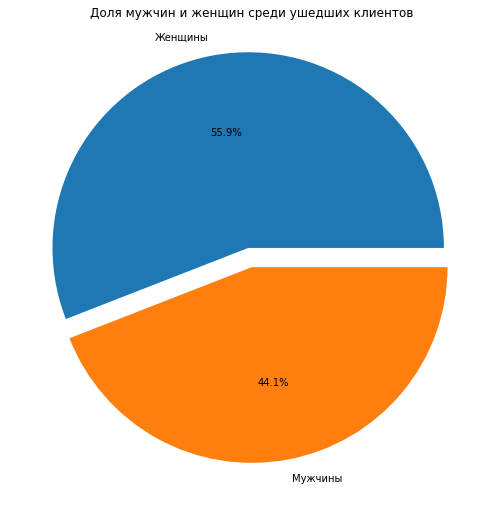

In [ ]:
fig_6, axes_6 = plt.subplots(figsize=(9, 9))
axes_6.pie(
    gone['Gender'].value_counts(), # берем данные об ушедших клиентах
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%', #округление до первого знака после запятой
    explode=[0.1, 0] #доля смещения от центра
)
axes_6.set_title('Доля мужчин и женщин среди ушедших клиентов');

**Вывод:** Разница небольшая, но женщины уходят чаще, чем мужчины.

### Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
# делаем сводную таблицу
pivot_1 = data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot_1 = pivot_1.fillna(0) # заменяем на 0 возможные пропуски данных

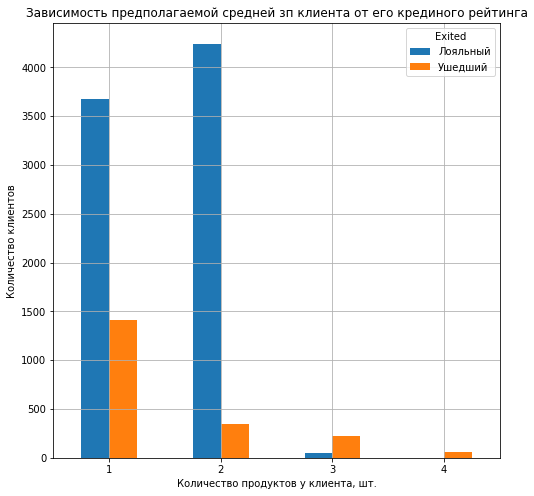

In [ ]:
fig_7, axes_7 = plt.subplots(figsize=(8, 8))
pivot_1.plot(
    kind='bar',
    ax=axes_7
)
axes_7.set_title('Зависимость лояльности клиентов от кол-ва используемых продуктов')
axes_7.set_xlabel('Количество продуктов у клиента, шт.')
axes_7.set_ylabel('Количество клиентов')
axes_7.tick_params(axis='x', labelrotation = 0)
axes_7.grid()

**Вывод:** Самое большое кол-во ушедших клиентов воспользовались только одним продуктом банка. Довольно печальная картина с клиентами, которые воспользовались 3 и 4 продуктами, там доня ушедших клиентов намного превышает лояльных, а с 4-мя продуктами так вообще составляет 100%.

### Задание 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
# делаем сводную таблицу
pivot_2 = data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)

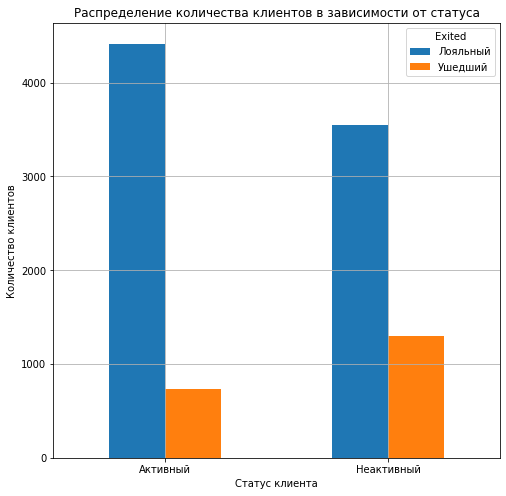

In [ ]:
fig_8, axes_8 = plt.subplots(figsize=(8, 8))
pivot_2.plot(
    kind='bar',
    ax=axes_8
)
axes_8.set_title('Распределение количества клиентов в зависимости от статуса')
axes_8.set_xlabel('Статус клиента')
axes_8.set_ylabel('Количество клиентов')
axes_8.tick_params(axis='x', labelrotation = 0)
axes_8.grid()

**Вывод:** Неактивные клиенты уходят чаще. Для уменьшения оттока клиентов стоит увеличить активность клиентов. *Для более конкретных выводов необходимо понимать, что именно означает актиный или неактивный клиент.*

### Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
# преобразовываем признак лояльности обратно, для удобства подсчета
data['Exited'] = data['Exited'].apply(lambda x: 0 if x == 'Лояльный' else 1)
churn_countryes = data.groupby(['Geography'])[['Exited']].mean()

In [ ]:
fig = px.choropleth(
    data_frame=churn_countryes,
    locations=churn_countryes.index,
    locationmode = "country names", 
    color="Exited", 
    title='Распределение доли ушедших клиентов по страном', 
    width=800, 
    height=500,
    range_color=[0, 0.5],
    color_continuous_scale='YlGnBu' 
)
fig.show()

**Вывод:** По графику видно, что большая доля ушедших клиентов находится в Германии. Возможных причин много. Наиболее вероятная-это большая конкуренция в данном регионе. Необходимо проверить актуальность предложений банка в данном регионе.

### Задание 9.10

Переведите числовой признак *CreditScore* в категориальный. Для этого воспользуйтесь функцией `get_credit_score_cat()`, которая приведена ниже. Примените её к столбцу *CreditScore* и создайте новый признак *CreditScoreCat* — категории кредитного рейтинга.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
data['CreditScoreCat'] = data['CreditScore'].apply(get_credit_score_cat)

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
# сводная таблица для тепловой карты корреляции
pivot_9 = data.pivot_table(
    'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

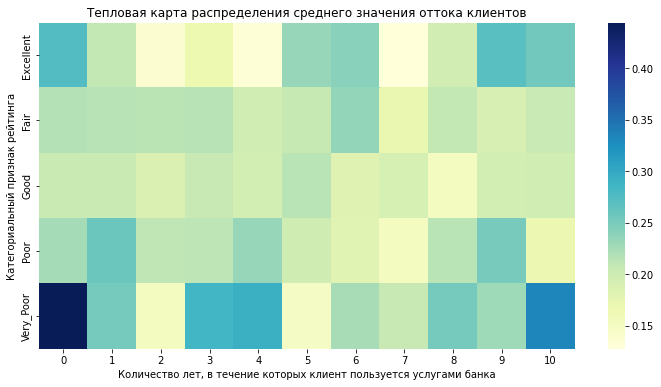

In [ ]:
fig_9, axes_9 = plt.subplots(figsize=(12, 6))
heatmap = sns.heatmap(data=pivot_9, ax=axes_9, cmap='YlGnBu')
heatmap.set_title('Тепловая карта распределения среднего значения оттока клиентов');
heatmap.set_ylabel('Категориальный признак рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка');

**Вывод:** Большинство ушедших клиентов относятся к категории с самым низким рейтингом, которые пользовались услугами банка менее года и более 10 лет, меньше отток с использованием услуг 3-4 года. Есть еще отток среди клиентов с самым высоким рейтинго, которые пользовались услугами менее года и больше 9 лет.